In [2]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import pandasql as psql
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
# function to read through a monthly citibike tripdata file
# and meanwhile build a station dictionary
def read_through (fname_in, fname_out, tripID, station_dict, datetime_format):
    f_in = open(fname_in, 'r')
    next(f_in) # skip fields name
    
    f_out = open(fname_out, 'a')

    for line in f_in:
        fields = line.replace('"', '').split(",")

        # trip ID
        tripID += 1

        # trip duration
        tripduration = int(fields[0])

        # date and hour of start time
        starttime = datetime.strptime(fields[1], datetime_format)
        date, hour = starttime.date(), starttime.hour

        # start and end stations ID
        startID, endID = int(fields[3]), int(fields[7])
        # build station map
        if not station_dict.has_key(startID):
            station_dict[startID] = [fields[4], float(fields[5]), float(fields[6])]
        if not station_dict.has_key(endID):
            station_dict[endID] = [fields[8], float(fields[9]), float(fields[10])]

        # usertype, age, and gender
        usertype = 1 if fields[12] == 'Subscriber' else 0
        age = 2015 - int(fields[13]) if fields[13] != "" else 0
        gender = int(fields[14])

        f_out.write("%i,%i,%s,%s,%i,%i,%i,%i,%i\n" %
                    (tripID, tripduration, date, hour, startID, endID, usertype, age, gender))

    f_in.close()
    f_out.close()
    
    return tripID, station_dict

In [100]:
# go through every month's file and build the station dictionary
# note that different month has different format for datetime
station_dict = {}
tripID = 0

f_out = open('./trips.csv', 'a')
f_out.write("tripID,tripduration,date,hour,startID,endID,usertype,age,gender\n")
f_out.close()    
    
tripID, station_dict = read_through('data/201411-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M:%S')
tripID, station_dict = read_through('data/201412-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M:%S')
tripID, station_dict = read_through('data/201501-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M')
tripID, station_dict = read_through('data/201502-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M')
tripID, station_dict = read_through('data/201503-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M')
tripID, station_dict = read_through('data/201504-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M:%S')
tripID, station_dict = read_through('data/201505-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M:%S')
tripID, station_dict = read_through('data/201506-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M')
tripID, station_dict = read_through('data/201507-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M:%S')
tripID, station_dict = read_through('data/201508-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M:%S')
tripID, station_dict = read_through('data/201509-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M:%S')
tripID, station_dict = read_through('data/201510-citibike-tripdata.csv', './trips.csv',
                                    tripID, station_dict, '%m/%d/%Y %H:%M:%S')

In [101]:
# output station dictionary
f_station = open('./stations.csv', 'w')
f_station.write("stationID,stationName,stationLatitude,stationLongitude\n")

for key in station_dict.keys():
    f_station.write("%i,%s,%f,%f\n" % 
                    (key, station_dict[key][0], station_dict[key][1], station_dict[key][2]))
f_station.close()

In [41]:
# read weather data
weather = pd.DataFrame.from_csv("data/weather.csv", sep=" ")
weather.head()

,PRCP,SNWD,TMAX,TMIN,AWND,WT06,WT02,WT04,WT08
DATE,,,,,,,,,
2014-10-01,5,0,183,161,27,-9999,-9999,-9999,1
2014-10-02,0,0,211,161,21,-9999,-9999,-9999,-9999
2014-10-03,0,0,217,133,19,-9999,-9999,-9999,-9999
2014-10-04,300,0,206,111,30,-9999,-9999,-9999,-9999
2014-10-05,0,0,161,78,25,-9999,-9999,-9999,-9999


PRCP - Precipitation (tenths of mm)  
SNWD - Snow depth (mm)  
TMAX - Maximum temperature (tenths of degrees C)  
TMIN - Minimum temperature (tenths of degrees C)  
AWND - Average daily wind speed (tenths of meters per second)  
WT06 - Glaze or rime  
WT02 - Heavy fog or heaving freezing fog (not always distinguished from fog)  
WT04 - Ice pellets, sleet, snow pellets, or small hail"  
WT08 - Smoke or haze  

In [76]:
weather.describe()

,PRCP,SNWD,TMAX,TMIN,AWND,WT06,WT02,WT04,WT08
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,31.565012,27.801418,171.054374,90.829787,23.959811,-9904.437352,-9809.874704,-9975.359338,-7233.042553
std,84.367510,81.692049,106.884530,100.399625,10.500092,968.970595,1363.774710,486.216638,4478.444896
min,0.000000,0.000000,-71.000000,-166.000000,5.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,0.000000,0.000000,78.000000,17.000000,17.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,0.000000,0.000000,178.000000,100.000000,22.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,10.000000,0.000000,269.500000,178.000000,29.000000,-9999.000000,-9999.000000,-9999.000000,1.000000
max,645.000000,480.000000,361.000000,278.000000,65.000000,1.000000,1.000000,1.000000,1.000000


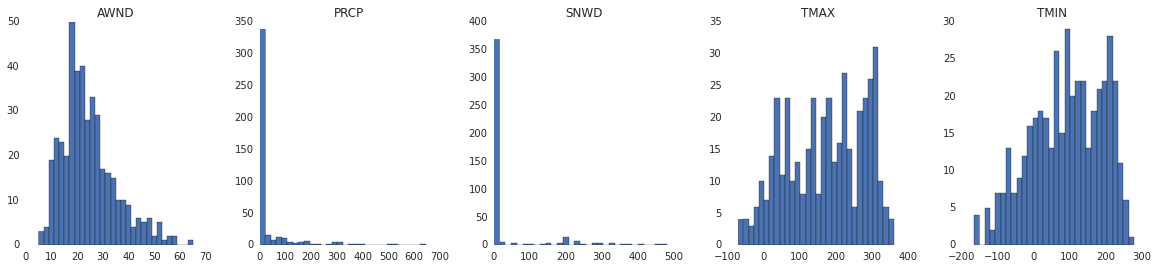

In [146]:
# Histogram of precipitation, wind speed, snow, and temperatures
fig, myaxes = plt.subplots(nrows=1, ncols=5, figsize = (20, 4))
weather[['PRCP','SNWD','TMAX','TMIN','AWND']].hist(ax=myaxes, bins=30)
plt.show()

In [153]:
# for PRCP, SNWD, and AWND, consider one SD away as extreme weathers
heavy_rain = weather['PRCP'] > weather['PRCP'].mean() + weather['PRCP'].std()
weather['heavy_rain'] = heavy_rain.astype(int)

heavy_snow = weather['SNWD'] > weather['SNWD'].mean() + weather['SNWD'].std()
weather['heavy_snow'] = heavy_snow.astype(int)

too_windy = weather['AWND'] > weather['AWND'].mean() + weather['AWND'].std()
weather['too_windy'] = too_windy.astype(int)

# consider max temp > 30 degree as too hot and min temp < 0 as too cold
too_hot = weather['TMAX'] > 300
weather['too_hot'] = too_hot.astype(int)

too_cold = weather['TMIN'] < 0
weather['too_cold'] = too_cold.astype(int)

# combine WT02, WT04, WT06, and WT08 together as extreme weathers
extreme_weather = ((weather['WT06'] == 1) | (weather['WT02'] == 1) |
                   (weather['WT04'] == 1) | (weather['WT08'] == 1))
weather['extreme_weather'] = extreme_weather.astype(int)

# final look
weather[['heavy_rain','heavy_snow','too_windy',
         'too_hot','too_cold','extreme_weather']].head()

,heavy_rain,heavy_snow,too_windy,too_hot,too_cold,extreme_weather
DATE,,,,,,
2014-10-01,0,0,0,0,0,1
2014-10-02,0,0,0,0,0,0
2014-10-03,0,0,0,0,0,0
2014-10-04,1,0,0,0,0,0
2014-10-05,0,0,0,0,0,0


In [152]:
# write the simplified weather data into a file
weather[['heavy_rain','heavy_snow','too_windy',
         'too_hot','too_cold','extreme_weather']].to_csv('weather.simplified.csv')